# Método de Euler


In [1]:
from pylab import *

In [2]:
def mi_euler(ec_EDO, t, x0, delta = 0.01): 
    #ec_edo es el sistema a integrar
    #t es el intervalo de integración
    #x0 es el punto inicial
    #h juega el rol de paso
    tiempos = arange(t[0],t[1] + delta, delta) #Hace la partición dle tiempo.
    N = len(tiempos)
    sol = zeros(N) #Para acomodar las soluciones
    sol[0] = x0
    for i in range(N-1): #Inician las iteraciones
        sol[i+1] = sol[i] + delta*ec_EDO(tiempos[i], sol[i]) #De la deducción dada en la libreta
    return sol, tiempos

In [3]:
#arange(0, 10, 0.1) Crea una lista que empieza en 0, termina de 10 (sin contarlo) y va saltando de 0.1 en 0.1.

$$
\frac{dy}{dt} = \cos(t)
$$
con $y(0) = \pi/2$

La solución es: $y(t) = \sin(t) + \pi / 2$

In [4]:
def ec_dif1(t,y):
    return cos(t)

In [5]:
sol, t = mi_euler(ec_dif1, [0, pi], pi/2)

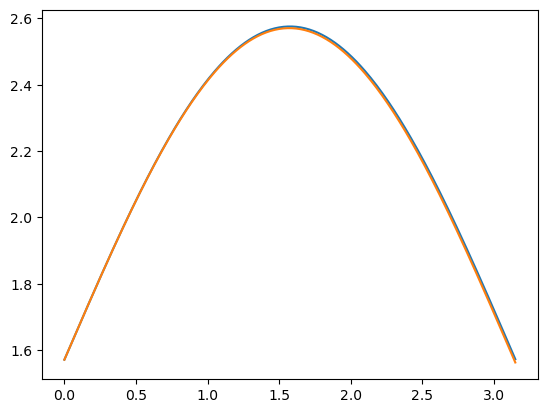

In [6]:
plot(t, sol)
plot(t, sin(t) + pi/2)
show()

$$
\frac{dy}{dt} = 2y
$$

Con $y(0) = 3e^{2t}$

La solución sería $y(t) = 3e^{2t}$

Ahora, ¿cómo le hacemos para resolver ecuaciones de segundo orden?

In [7]:
def ec_dif2(t,y):
    return 2*y

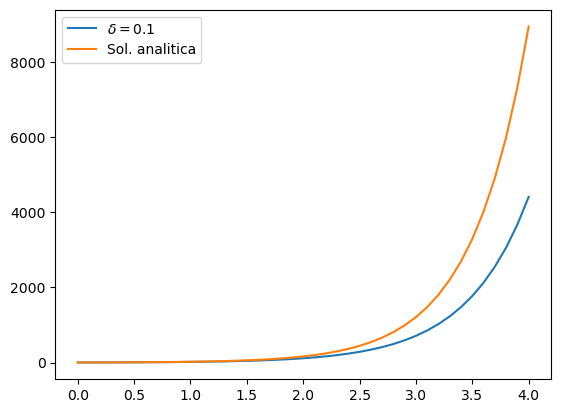

In [8]:
sol, t = mi_euler(ec_dif2, [0, 4], 3, delta = 0.1)
plot(t, sol, label ='$\delta = 0.1$')
plot(t, 3*exp(2*t), label = 'Sol. analitica')
legend()
show()

$$
\frac{dy²}{dt^2} = -y
$$
con $y_{0} = 7$ y $y'_{0} = 0$. La solución es $y(t)= 7\cos(t)$

Hacemos $u:= \frac{dy}{dt}$ y por lo tanto $\frac{du}{dt} = \frac{dy²}{dt²} = -y$. Por lo tanto:

$$
\frac{dy}{dt} = u \\
\frac{du}{dt} = -y
$$
Con condición enecial (y, u) = (7,0)

Modificando el código para que se valga para n ecuaciones

In [19]:
def mi_euler_mas(ec_EDO, t, x0, delta = 0.001): 
    #ec_edo es el sistema a integrar
    #t es el intervalo de integración
    #x0 es el punto inicial
    #h juega el rol de paso
    tiempos = arange(t[0],t[1] + delta, delta) #Hace la partición dle tiempo.
    M, N = len(x0), len(tiempos)
    sol = zeros((M, N)) #Para acomodar las soluciones. M renglones por N columnas
    sol[:,0] = x0 #Lo acomoda como vector coumna
    for i in range(N-1): #Inician las iteraciones
        sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i], sol[:,i]) #De la deducción dada en la libreta
    return sol, tiempos

In [23]:
def ecdif3(t,y):
    return array([y[1], -y[0]])

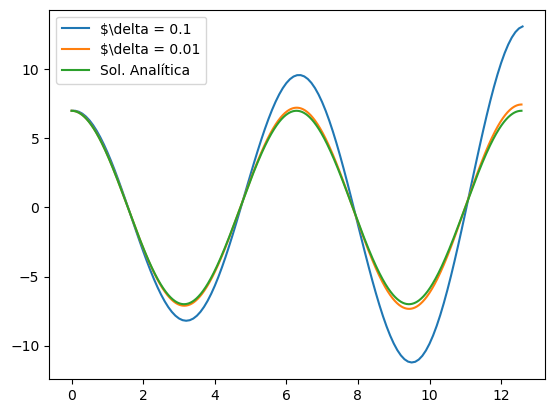

In [24]:
sol, t = mi_euler_mas(ecdif3, [0,4*pi], [7,0], delta = 0.1)
plot(t, sol[0], label = '$\delta = 0.1')
sol, t = mi_euler_mas(ecdif3, [0,4*pi], [7,0], delta = 0.01)
plot(t, sol[0], label = '$\delta = 0.01')
plot(t, 7*cos(t), label = 'Sol. Analítica')
legend()
show()

## Método del Óiler-Yacobi 

In [38]:
A = array([[1,1],[0,1]])
v = array([3,5])
print(A, v)
dot(A,v)

[[1 1]
 [0 1]] [3 5]
(2,)


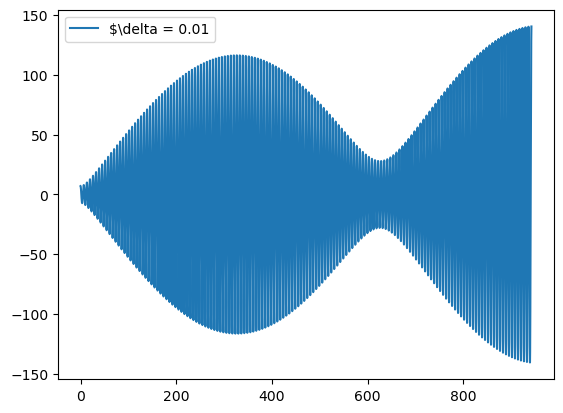

In [64]:
def ecdif4(t,y, omega = 1.01): #Cuando cambiamos el omega más cercano a 1, vemos cómo el sistema puede cada vez menos
    #jalar al sistema al origen y empieza a diverger
    return array([y[1], -y[0] + cos(omega * t)])

sol, t = mi_euler_mas(ecdif4, [0,300*pi], [7,0], delta = 0.001)
plot(t, sol[0], label = '$\delta = 0.01')
legend()
show()